<img src="files/Pics/LOGOS.png" width="800">

# Labor 01: Lineáris regresszió egy változóval
### Profit a városban:
A gyakorlat során egyváltozós lineáris regressziót fogunk implementálni, melynek segítségével képesek leszünk a profit predikciójára egy élelmiszerellátó egységnek.

Képzeljük el, hogy CEO-k vagyunk egy élelmiszerláncnál és azon gondolkodunk, hogy hol nyissunk egy új üzletet, melyik városokban érné meg ez nekünk. Az élelmiszerláncolatnak már megvan az ehhez szükséges feltételei csak el kéne dönteni, melyik városban bővüljön. Ehhez segítségünkre lesz a cég által begyűjtött adathalmaz a városok népességéről és a várható profitról.

### 1: Importáljuk be a fontos csomagokat
Szükségünk lesz a matplotlib bizonyos elemeire a rajzoláshoz és a NumPy -ra az egyszerűbb tömb kezelés miatt.

In [57]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
%run ./tests.ipynb

### 2: Adatok beolvasása fileból

Fontos, hogy egy buborékba legyen a megnyitás és lezárás. Egyéb esetekben nem várt hibát okozhat.<br>
Ha a data file a main file mellett van egyszerűen megy a beolvasás. <br>
Bonyolultabb fájlstruktúra esetén az egész elérési utat meg kell adni. <br>
A nyers, szétválogatás nélküli adatok ezek után egy változóban lesznek eltárolva. <br>
Opcionális: Irassuk ki az eredményt, hogy lássuk mi legyen a következő lépés az adatok rendezésére.

In [2]:
file=open("Lab1data.txt",'r')
lines=file.readlines()
file.close()                    

#print(lines)

Rendezzük az adatainkat a megfelelő változókba. Először definiálunk 2 listát, X-et és Y-t. Soronkét haladva az elválasztó karakter mentén daraboljuk szét az adatokat. Majd NumPy tömbbé alakítjuk és 2 oszlop vektorrá formázzuk az adatokat. A művelet végén mindkét tömb dimenziója m x 1 lesz, ahol m a minták száma.  

In [3]:
X=[]                               # listák definiálása
Y=[]
for line in lines:                 # Soronként végigmegyünk a beolvasott adatokon
  a,b = line.split(',')            # és szétdaraboljuk az elválasztó karakternek megfelelően
  X.append(float (a))
  Y.append(float(b))

X=np.array(X)                      # Numpy tömbbé alakítjuk az adatainkat
Y=np.array(Y) 
m=Y.size
X=X.reshape(m,1)                   # Formátum egyeztetés végett mx1-es mátrixként kezeljük az oszlopvektorokat is 
Y=Y.reshape(m,1) 

print('X dimenziója:', X.shape, '; X értékei:\n', X, '\n')                
print('Y dimenziója:', Y.shape, '; Y értékei:\n', Y, '\n')
print('Az adatok száma: ', m)

X dimenziója: (97, 1) ; X értékei:
 [[ 6.1101]
 [ 5.5277]
 [ 8.5186]
 [ 7.0032]
 [ 5.8598]
 [ 8.3829]
 [ 7.4764]
 [ 8.5781]
 [ 6.4862]
 [ 5.0546]
 [ 5.7107]
 [14.164 ]
 [ 5.734 ]
 [ 8.4084]
 [ 5.6407]
 [ 5.3794]
 [ 6.3654]
 [ 5.1301]
 [ 6.4296]
 [ 7.0708]
 [ 6.1891]
 [20.27  ]
 [ 5.4901]
 [ 6.3261]
 [ 5.5649]
 [18.945 ]
 [12.828 ]
 [10.957 ]
 [13.176 ]
 [22.203 ]
 [ 5.2524]
 [ 6.5894]
 [ 9.2482]
 [ 5.8918]
 [ 8.2111]
 [ 7.9334]
 [ 8.0959]
 [ 5.6063]
 [12.836 ]
 [ 6.3534]
 [ 5.4069]
 [ 6.8825]
 [11.708 ]
 [ 5.7737]
 [ 7.8247]
 [ 7.0931]
 [ 5.0702]
 [ 5.8014]
 [11.7   ]
 [ 5.5416]
 [ 7.5402]
 [ 5.3077]
 [ 7.4239]
 [ 7.6031]
 [ 6.3328]
 [ 6.3589]
 [ 6.2742]
 [ 5.6397]
 [ 9.3102]
 [ 9.4536]
 [ 8.8254]
 [ 5.1793]
 [21.279 ]
 [14.908 ]
 [18.959 ]
 [ 7.2182]
 [ 8.2951]
 [10.236 ]
 [ 5.4994]
 [20.341 ]
 [10.136 ]
 [ 7.3345]
 [ 6.0062]
 [ 7.2259]
 [ 5.0269]
 [ 6.5479]
 [ 7.5386]
 [ 5.0365]
 [10.274 ]
 [ 5.1077]
 [ 5.7292]
 [ 5.1884]
 [ 6.3557]
 [ 9.7687]
 [ 6.5159]
 [ 8.5172]
 [ 9.1802]
 [ 6.00

Rajzoltassuk ki az adatokat egy grafikonra, hogy láthassuk az adatok struktúráját!

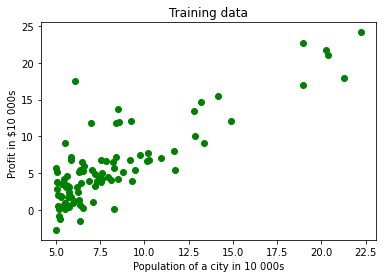

In [4]:
plt.plot(X,Y,'o', c= "g")   
plt.title("Training data")
plt.xlabel("Population of a city in 10 000s")
plt.ylabel("Profit in $10 000s ")
plt.show()

A grafikonon tehát látható például, hogy egy 150.000 népességű városban kb 120.000$ nyereség várható. Ezek a címkézett adataink, tehát minden mintának megvan az elvárt kimenete is. Példánk során a népesség adatok lesznek a bemeneteke és a várható profit a kimenet.

### 3: A hipotézis: Lineáris regressziós modell
A grafikonon látható adatokat egy egyenessel próbáljuk meg közelíteni, ez lesz a kiindulási hipotézisünk.
Lineáris regressziós modellünk az alábbi alakban írható fel:

$ h_{w}(x) = w_{0} + xw_{1}  = \hat{y}$

,ahol <br>
$h$ - hipotézis<br>
$x$ - bemenő adat, vagy más néven feature. (Modellünkben egy darab változó van.)<br>
$w$ - súlyok, vagy más néven weight <br>
$\hat{y}$ - becslés

Az algoritmus blokkvázlatát az alábbi ábra szemlélteti.

<img src="files/Pics/L01_Model.png" width="350">

A cél, hogy egy város méretét megadva a hipotézisunknek megfelelően a várható profit legyen a kimenet. Ahhoz, hogy ezt megtegyünk a hipotézésünket kell először felállítani. Első lépésben megadjuk a modellt, ami esetünkben a lineáris illeszkedés, majd a paramétereket a rendelkezésünkre álló minták segítségével állítjuk be, vagyis betanítjuk.

A modellünk jóságának vizsgálatához definiálnunk kell egy költség függvényt. A költség függvény fogja meghatározni, hogy mennyire jó a modellünk az adott iterációban.

### 4. Költség függvény (Cost function)

Költségfüggvénynek (más néven Cost function vagy Hiba függvény) az MSE (Mean Squared Error) függvényt választjuk, mely az alábbi alakban írható fel:

$C=\frac{1}{2m}\sum_{i=1}^{m}(\hat{y}^{i}-y^{i})^2$

Vagyis a mintákhoz tartozó becsléseink és címkéink különbségeinek négyzetes összege. Így a hiba mindig egy pozítív szám lesz, minél kisebb, annál jobb a becslésünk. A mintaszámnak megfelelő konstans szorzó tag a későbbiekben kap majd több szerepet. A hibafüggvén jellegét nem befolyásolja.

Behelyettesítve a hipotézisünket az alábbi alakot kapjuk:

$C=\frac{1}{2m}\sum_{i=1}^{m}(h_w(x^{i})-y^{i})^2$

Végső teljes formában pedig:

$ C(w_{0},w_{1})=\frac{1}{2m} \cdot \sum_{i=1}^{m}(w_{0} + x^iw_{1} − y^{i})^2 $
 
Mivel előre látóan úgy definiáltuk a hipotézisünket, hogy az egyenes meredekségén kívül az eltolását is tudjuk állítani a $w_0$ súllyal a mátrix műveletek elősegítése érdekében érdemes bevezetni egy változót. Legyen $x_0=1$, tehát az egy változós bemenetünket kibővítettük egy BIAS taggal. 

$ C(w_{0},w_{1})=\frac{1}{2m} \cdot \sum_{i=1}^{m}(w_{0}x^{i}_{0} + w_{1}x^{i}_{1} − y^{i})^2 $

Ezzel a bővítéssel, miszerint a constans 1-es tagot is bemeneti változónak tekintjük, a mátrixos felírást segítettük elő. 

Mátrixos formában a következő képpen írhatjuk fel a költség függvényt:

$ C = \frac{1}{2m} \cdot \sum(XW-Y)^2 $

Tekintsük át a példa során használt mátrixokat.

<img src="files/Pics/L01_Matrixok.png" width="350">

Ezen mátrixok segítségével a mintánkénti becslésünk és az összes mintára vonatkozó költség függvény kiszámítása is egyszerűen elvégezhető.
<img src="files/Pics/L01_CostCalculation.png" width="550">

Hozzuk létre a szükséges mátrixokat! A kezdeti súlyokat 0-val inicializáljuk!

In [5]:
# W inicializálása, X bővítése
######################################################
if (X.shape[1] == 1):
    X=np.column_stack((np.ones(m),X))

W=np.zeros((2,1))   
######################################################

test1()

Eddig jó, tovább mehet!


Ellenőrizzük le a tömbjeink dimenzióját a mátixműveletek előtt.

In [6]:
print('X dimenziója:\n', X.shape)                
print('Y dimenziója:\n', Y.shape)
print('W dimenziója:\n', W.shape)

X dimenziója:
 (97, 2)
Y dimenziója:
 (97, 1)
W dimenziója:
 (2, 1)


### Költség függvény:
Definiáljuk a költségfüggvény kiszámolására egy függvényt, amely bemenő paraméterként megkapja az $X$, $Y$ és $W$ mátrixokat és a kiszámolt skalár költséggel tér vissza.

In [7]:
def computeCost(X,Y,W):
######################################################   
    m = Y.shape[0]
    C = np.sum((X@W - Y)**2, axis=None)/(2*m)
######################################################
    return C

test2()

Az eredmények helyesek! Tovább mehet!


In [8]:
C1=computeCost(X,Y,np.array([[0],[0]]).reshape((2,1)))
print('''Teszt (Cost function):
\tSúlyok: W = [0;0]
\tElvárt érték (közelítve) = 32.0727
\tSzámolt érték = ''',C1)
C2=computeCost(X,Y,np.array([[-1],[2]]))
print('''\n\tSúlyok: W = [-1;2]
\tElvárt érték (közelítve) = 54.2425
\tSzámolt érték = ''',C2)

Teszt (Cost function):
	Súlyok: W = [0;0]
	Elvárt érték (közelítve) = 32.0727
	Számolt érték =  32.072733877455676

	Súlyok: W = [-1;2]
	Elvárt érték (közelítve) = 54.2425
	Számolt érték =  54.24245508201238


### 5. Gradiens módszer:

Miután definiáltuk a költség függvényt a feladatunk a költségfüggvény minimalizálása. Optimumra törekszünk. A minimum pont megtalálásához pedig a graiens módszert fogjuk alkalmazni.

A gradiens módszer lényege, hogy a függvény adott pontjában kiszámoljuk annak gradiensét (deriváltját). A derivált esetünkben gyakorlatilag meghatározza a függvény érintő egyenesét az adott pontban. Ennek megfelelően meg tudjuk határozni, hogy a függvényen merre kell elmozdulnunk, hogy a minimumhoz közelebb kerüljünk. A minimum pontotban a függvény deriváltja 0.

<img src="files/Pics/L01_Gradient.png" width="450">

A költség függvény gradiensét (parciális deriváltjait) kiszámolva modosítjuk a súlyokat. A modosításokat addig folytatjuk, amíg az algoritmus be nem konvergál a minimum pontba.

A súlyfrissítés a gradiens módszer az alábbi képlettel írható le: 

$w_j:=w_j-\mu\frac{\partial}{\partial w_j}C(w_0,w_1)$ 

,ahol <br>
$\mu$ - tanulási ráta, a konvergencia gyorsaságának beállítására szolgáló paraméter. Értéke $0 < \mu < 1$.

$\mu$ - t kicsinek választva a konvergencia lelasssul, viszont jobban megközelíti a minimum pontot <br>
$\mu$ - t túl nagyra állítva előfordulhat divergencia, ami az algoritmus elszállásához vezethet. 

Amire figyelni kell a módszer alkalmazásakor, hogy a súlyók módosítását egyszerre, szinkronban kell elvégezni.


### 6. Gradiens módszer alkalmazása Lineáris regresszióra

A lineáris regressziós modell hipotézise és költség függvénye:

$ h_w(x)=w_0+w_1x $

$ \color{blue}{C(w_0,w_1)}=\frac{1}{2m}\sum_{i=1}^{m}(h_w(x^{i})-y^{i})^2 $

A gradiens módszer súlyfrissítése:

$w_j:=w_j-\mu\frac{\partial}{\partial w_j}\color{blue}{C(w_0,w_1)}$ 

Behellyetesítve a lineáris regressziós modellt a gradiens módszerbe a parciális deriváltra kapjuk a következőt:

$ \frac{\partial}{\partial w_j}C(w_0,w_1)=\frac{\partial}{\partial w_j}\frac{1}{2m}\sum_{i=1}^{m}(h_w(x^{i})-y^{i})^2
=\frac{\partial}{\partial w_j}\frac{1}{2m}\sum_{i=1}^{m}(w_0+w_1x^i-y^{i})^2 $

Elvégezve a parciális deriválást a súlyoknak megfelelően.

$ \color{red}{(j=0)}\hspace{7mm} \frac{\partial}{\partial w_j}C(w_0,w_1)=\frac{1}{m}\sum_{i=1}^{m}(w_0+w_1x^i-y^{i})\cdot 1=\frac{1}{m}\sum_{i=1}^{m}((h_w(x^{i})-y^{i})\cdot \color{red}{x_0^i}) $

$ \color{red}{(j=1)}\hspace{7mm} \frac{\partial}{\partial w_j}C(w_0,w_1)=\frac{1}{m}\sum_{i=1}^{m}(w_0+w_1x^i-y^{i})\cdot x_1^i=\frac{1}{m}\sum_{i=1}^{m}((h_w(x^{i})-y^{i})\cdot x_1^i) $

Tehát ennek megfelelően a példánk súlyfrissítései a következő képpen adódnak:

$ w_0=w_0-\frac{\mu}{m}\sum_{i=1}^{m}((h_w(x^{i})-y^{i}) \cdot \color{red}{x_0^i}) $

$ w_1=w_1-\frac{\mu}{m}\sum_{i=1}^{m}((h_w(x^{i})-y^{i}) \cdot x^i_1) $

Mivel bevezettük a $ x_0 $ -t mint változót, a súlyfrissítési képlet jól általánosítható a különböző esetekre. Figyelni kell továbbá, hogy a kódolás során a súlyokat egyszerre frissítsük, mivel az aszinkron frissítés számolás beli hibát okzhat!


A folyamatot addig folytatjuk, míg el nem érjük az optimum pontot vagy el nem érünk egy kívánt iterációs számot. Definiáljunk tehát egy tanulási rátát és egy epoch számot, amely a kívánt frissítések számát fogja limitálni.

In [9]:
epochs= 1500                       
learning_rate=0.01

Definiáljuk egy függvényt, mely végrehajtja a gradiens módzsert. A függvényen belül a $C_{history}$ változóba tároljok a költségfüggvényünk előző értékeit is a későbbi kiértékeléshez!

In [59]:
def gradientDescent(X, Y, W, learning_rate, epochs):
    m = Y.size
    C_history = np.zeros((epochs,1))
######################################################    #VIGYÁZAT szimultán update!!!!!

    for i in range(0,epochs):
        new_W=np.zeros((2,1))
        new_W[0] = W[0] - (learning_rate/m) * np.sum(X@W-Y, axis=None)
        new_W[1] = W[1] - (learning_rate/m) * np.sum((X@W-Y)*(X[:,1].reshape(97,1)), axis=None)
        W=new_W.copy()
        C_history[i] = computeCost(X,Y,W)
        
######################################################
    return W,C_history

test3()

A függvény jól működik, tovább mehet!


Futtassuk le a grádiens módszert alkalmazó függvényünket!

In [ ]:
print('''\n gradientDescent() függvény teszt (learning_rate=0.01):
\tWeights expected (approx.): 
\t [-3.6303] [1.1664]''')
W,C_history=gradientDescent(X,Y,W,learning_rate,epochs)
print('\tWeights calculated:\n\t',W[0],W[1])

if (W[0]+3.6303) < 0.1 and (W[1]-1.1664) < 0.1:
    print("\n A gradientDescent függvény megfelelő. Tovább mehet.")
else:
    print("\n Valami nem stimmel. Korrekció szükséges!")

### 7. Vizualizáció
### Költségfüggvény megjelenítése az iterációk során:
Rajzoljuk ki a költségfüggvény értékeit az iterációk során! Ezáltal láthatjuk, hogy az algoritmusunk ténylegesen hogyan konvergál az epochoch során. 

In [ ]:
plt.plot(C_history)
plt.title("Cost function of Gradient descent algorithm")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

### Az illesztett egyenes megjelenítése a bemeneti adatokra

In [ ]:
plt.plot((X[:,1]).reshape(97,1),Y,'o', label = "Training data")
plt.plot((X[:,1]).reshape(97,1),X@W,'-',label = "Linear regression")
plt.xlabel("Population of a city in 10 000s")
plt.ylabel("Profit in $10 000s ")
plt.title("Linear regression and the training data")
plt.legend()
plt.show()

### 8. Predikció a tanított modellel
A modell használatához végezzünk becslést egy 10.000 és egy 17.000 fős városban a várható profitra.

In [ ]:
Prediction1 = (np.array([1, 10]))@W
Prediction2 = (np.array([1, 17]))@W
print('\nPrediction for 10 000 citizens: %.2f $' % (Prediction1 * 10000))
print('\nPrediction for 17 000 citizens: %.2f $' % (Prediction2 * 10000))

### Költségfüggvény megjelenítése / surface plot
A jobb szemléltetés érdekében érdemes megvizsgálni a költségfüggvényt egy nagyobb intervallumon. Ehhez hozzunk létre egy-egy vektort a két súlyunknak, és minden értékpárra számoljuk ki a költséget. Így kaphatunk egy képet, milyen felületen kerestük az optimum pontot és hol találtuk azt meg.

In [ ]:
w0_vals = np.linspace(-10,10,100)
w1_vals = np.linspace(-1,4,100)
C_vals = np.zeros((w0_vals.size,w1_vals.size))

for i in range((w0_vals).size):
    for j in range((w1_vals).size):
        t=np.array([w0_vals[i],w1_vals[j]]).reshape(2,1)
        C_vals[[i],[j]]= computeCost(X,Y,t)
C_vals=C_vals.T

fig= plt.figure()
ax=plt.axes(projection='3d')
x, y = np.meshgrid(w0_vals, w1_vals)
surf = ax.plot_surface(x, y, C_vals, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title("Surface plot of the Cost function")
plt.xlabel("w0")
plt.ylabel("w1")
plt.show()

### Költségfüggvény megjelenítése / contour plot
A contour plot szintén egy hasznos megjelenítési lehetőség, melynek előnye, hogy 2D-be lapítottuk a 3D-s felületünket a könnyebb átláthatóság kedvéért.

In [ ]:
plt.contour(w0_vals,w1_vals,C_vals,np.logspace(-2,3,20))
plt.plot(W[0],W[1],'x')
plt.title("Contour plot of C_vals in logarithmic scale")
plt.xlabel("w_0")
plt.ylabel("w_1")
plt.show()

## Mégegyszer. Magasabb szintű csomagok használatával:
A Python és különbőző magasabb szintű csomagjai használatával lehetőséget biztosít sokkal kompaktabb kód írására is, ezzel elősegítve a gyors prototipizálást. Lássunk, hogy lehet a gyakorlat során megvizsgált példát tömörebben megoldani.

In [ ]:
import pandas as pd                                  # Pandas az adatkezelésre
from sklearn.linear_model import LinearRegression    # sklearn a tanuló algoritmus helyett
import matplotlib.pyplot as plt

data = pd.read_csv('Lab1data.txt', header = None)    # adatok beolvasása
XX = data.iloc[:, 0].values.reshape(-1, 1)           # adatok szétválogatása
YY = data.iloc[:, 1].values.reshape(-1, 1)           # adatok szétválogatása


lin_reg = LinearRegression()                         # lineáris regresszió class létrehozása
lin_reg.fit(XX,YY)                                   # lineáris regresszió illesztése
pred1 = lin_reg.predict([[10]])                      # predikció 10 000 főre
pred2 = lin_reg.predict([[17]])                      # predikció 17 000 főre

print('Prediction for a city with a population of 10 000: %.2f $' % (pred1*10000))
print('Prediction for a city with a population of 17 000: %.2f $' % (pred2*10000))

regline = lin_reg.predict([[5],[22.5]])              # regressziós egyenes kiiratásához kell    

plt.scatter(XX,YY, label = "Training data")          # plot
plt.plot([[5],[22.5]],regline,'r')
plt.xlabel("Population of a city in 10 000s")
plt.ylabel("Profit in $10 000s ")
plt.title("Linear regression and the training data")
plt.legend()
plt.show()

<div style="text-align: right">Ez a laborgyakorlat felhasznál elemeket Andrew Ng Machine Learning c. kurzusából.</div>